# XAI ASSIGNMENT 4
# NAME: TIFFANY DEGBOTSE
# Datset: Asaniczka. (2024). Full TMDB Movies Dataset 2024 (1M Movies) [Data set]. Kaggle. ODC Attribution License. Available at: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
# Model Used:
#Random Forest Regressor
#Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324

## Installations

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install scipy==1.13.1


  Using cached numpy-1.25.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-121og7vk/alepython_159e7883c83c4a7191e5ae1f5215a809
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-121og7vk/alepython_159e7883c83c4a7191e5ae1f5215a809
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab67

In [ ]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

np.random.seed(1)

In [ ]:
%cd "XAI_assignment4"

/content/XAI_assignment4


# Using IMDB DATASET
### The dataset I chose had a problematic row

In [ ]:
import pandas as pd

data = pd.read_csv(
    "src/TMDB_movie_dataset_v11.csv",
    engine="python",        # more flexible parser
    on_bad_lines="skip"     # skip problematic rows
)


# Inspecting the data

In [ ]:
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Dropping rows that have missing values in important columns(eye inspecting of features not use of feature importance)

In [ ]:
# Drop rows with missing values in important cols
data = data.dropna(subset=["budget", "popularity", "runtime", "vote_average", "vote_count"])

## The training was taking long so I decided to reduce my dataset
# Sampled Data

In [ ]:
data_sampled = data.sample(5000, random_state=42)


In [ ]:
data_sampled.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
2807,42684,Skyline,4.983,1501,Released,2010-11-11,66984888,92,False,/22RHzAdZDXukBBFewCOT099jZWL.jpg,...,Skyline,When strange lights descend on the city of Los...,23.811,/8QpvbnNrtzijlwiM0bFVeilc6lc.jpg,Don't look up,"Science Fiction, Adventure, Action, Thriller","Rat Entertainment, Rogue Pictures, Hydraulx, T...",United States of America,"English, Spanish","missile, transformation, light, giant monster,..."
4819,9663,Starman,6.878,756,Released,1984-12-13,28744356,115,False,/fny1B9hmVilFtU3RRjkMZffBjUi.jpg,...,Starman,When an alien takes the form of a young widow'...,11.121,/cgDeFWkYi6e9FT5RiQPCbQ9HlXZ.jpg,"In 1977 Voyager II was launched into space, in...","Science Fiction, Romance, Drama","Columbia Pictures, Industrial Light & Magic, D...",United States of America,English,"widow, lovers, alien, cherry pie"
5519,582883,Deerskin,6.438,622,Released,2019-06-19,1686700,77,False,/exqNtu2l1b8cpAnFnGcBPVqccHg.jpg,...,Le Daim,A man's obsession with owning the designer dee...,8.723,/r5O84lMJRMQStl8GGJzAgkkdqP0.jpg,Killer. Style.,"Comedy, Horror","Atelier de Production, ARTE France Cinéma, Nex...","Belgium, France, Switzerland",French,"leather jacket, obsession, paranoia, bartender..."
10171,53985,Mutant Pumpkins from Outer Space,5.800,250,Released,2009-04-01,0,27,False,/g17w3GkHkJiB0R3IB6AvtIEQQ07.jpg,...,Mutant Pumpkins from Outer Space,Susan Murphy (a.k.a. Ginormica) and the Monste...,9.278,/w3R9G8rqrrbMSOufl0QBaNAZPDC.jpg,NaN,"TV Movie, Animation, Family, Comedy",DreamWorks Animation,United States of America,English,"monster, mutant, alien"
7654,340674,Dark Crimes,4.534,386,Released,2016-10-12,0,93,False,/efWRa5cvJylrqW7Go3lhhPcitKL.jpg,...,Dark Crimes,"Tadek, a Polish detective, becomes suspicious ...",18.911,/bEwK1r4pmJ9huEjqrZf73NXJvFy.jpg,It takes a dark mind to solve a twisted crime,"Drama, Thriller","RatPac Entertainment, Gerson Film, InterTitle ...","United States of America, United Kingdom, Poland",English,"sexual abuse, businessman, kraków, poland, wri..."


## Defining target and features
## I chose just four features to help me interpret better since they are figures and would be easier to work with

In [ ]:
X = data_sampled[["budget", "popularity", "runtime", "vote_count"]]
y = data_sampled["vote_average"]

## Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train RandomForestRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## I included this beacause I noticed that after the PDP plots, the x axis wasn't showing the budget in millions of dollars. I read on it and found out PartialDependenceDisplay.from_estimator() internally uses Matplotlib to draw the figure and it has a default tick formatter.

In [ ]:
data_sampled["budget"].describe()


,budget
count,5.000000e+03
mean,1.881790e+07
std,3.550686e+07
min,0.000000e+00
25%,0.000000e+00
50%,3.500000e+06
75%,2.200000e+07
max,3.650000e+08


## Partial Dependence Plot for Budget
### From the plot below, we notice that small increases in budget lead to noticeably lower ratings, and once budgets get very large, additional money doesn’t change the rating much. Lower budgeted movies seem to have higher ratings

#### Using PartialDependenceDisplay

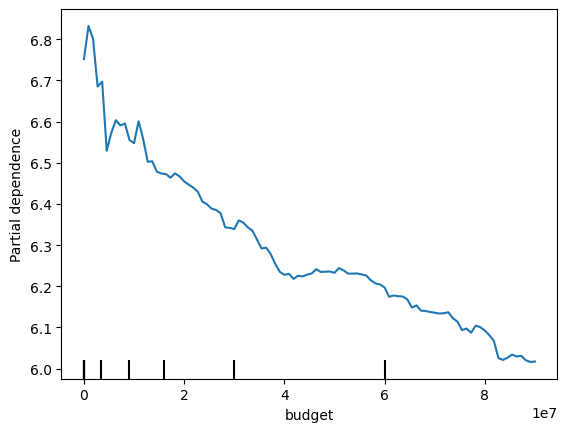

In [ ]:
# Choosing the feature of interest
features = ["budget"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

## Build my own PDP with numpy
## Based on this plot, similar to the other one, we see that low-budget films are predicted to receive higher ratings whilst high-budget films are predicted to receive lower ratings, but beyond a certain point (very large budgets), spending more doesn’t impact the rating further.



/tmp/ipython-input-3664276629.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4620253.164556962' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value


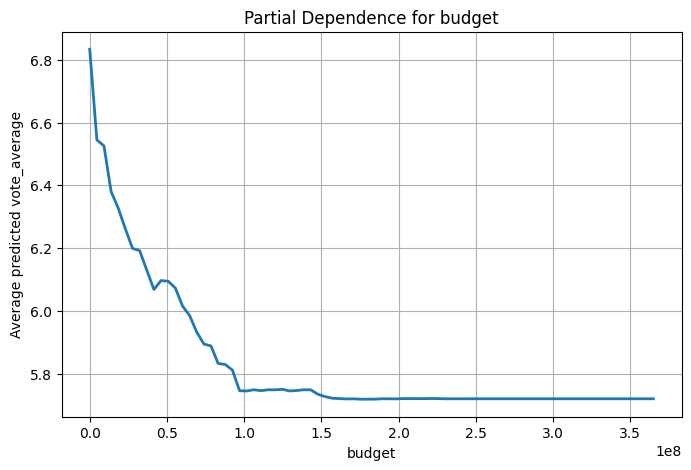

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature for which you want to plot partial dependence
feature_index = 0  # 0 = budget, 1 = popularity, 2 = runtime, 3 = vote_count
feature_name = X.columns[feature_index]

# Create a grid of values for the chosen feature
feature_values = np.linspace(
    np.min(X.iloc[:, feature_index]),
    np.max(X.iloc[:, feature_index]),
    num=80
)

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values)

# Duplicate the dataset to modify feature values
X_modified = X.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Replace chosen feature with the current grid value
    X_modified.iloc[:, feature_index] = value

    # Predict using the modified dataset
    predictions = model.predict(X_modified)

    # Store the average prediction
    average_predictions[i] = np.mean(predictions)

# Plot the partial dependence for the chosen feature
plt.figure(figsize=(8,5))
plt.plot(feature_values, average_predictions, linewidth=2)
plt.xlabel(feature_name)
plt.ylabel("Average predicted vote_average")
plt.title(f"Partial Dependence for {feature_name}")
plt.grid(True)
plt.show()


# Varying Grid Solution
### The analysis reveals that the model has learned a negative relationship between budget and predicted ratings. In particular, most of the variation occurs within the lower-budget range, where even small increases in budget lead to a noticeable decline in predicted ratings. Beyond this range, the effect diminishes, and additional increases in budget have little to no impact as the curve levels off. Importantly, the consistency of this downward trend across multiple grid resolutions suggests that the relationship is stable and not an artifact of the sampling method. I found this suspicious so I decided to plot a correlation matrix

/tmp/ipython-input-209550004.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19210526.315789472' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-209550004.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '17380952.38095238' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-209550004.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15208333.333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-209550004.py:38: FutureWarning: Setting an item of incompatible dty

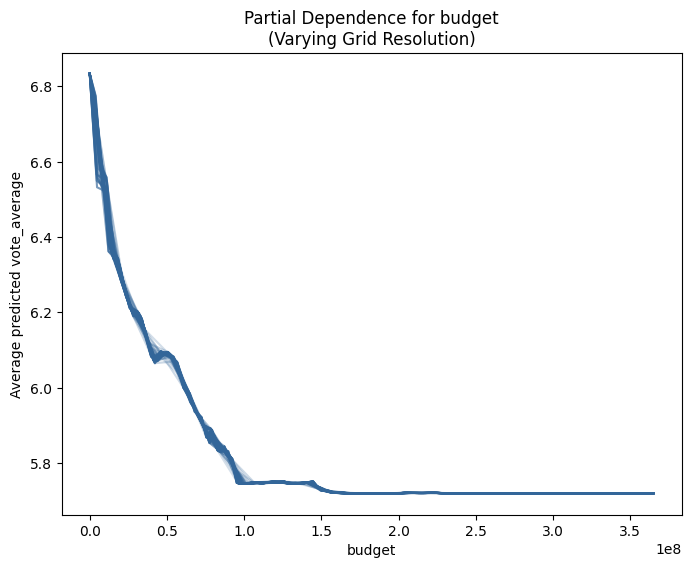

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import numpy as np

# Pick the feature index (0 = budget, 1 = popularity, 2 = runtime, 3 = vote_count)
feature_index = 0
feature_name = X.columns[feature_index]

# Define different grid lengths (how many points we evaluate PDP on)
grid_lengths = np.linspace(20, 120, 40).astype(int)

fig, ax = plt.subplots(figsize=(8, 6))

# Define a base color and alpha (transparency) values
base_color = (0.2, 0.4, 0.6)  # Blue-ish color
min_alpha = 0.2
max_alpha = 1.0

# Normalize grid_lengths between 0 and 1 for transparency scaling
normalized_g = (grid_lengths - grid_lengths.min()) / (grid_lengths.max() - grid_lengths.min())

for i, g in enumerate(grid_lengths):
    # Create feature grid with g points
    feature_values = np.linspace(
        np.min(X.iloc[:, feature_index]),
        np.max(X.iloc[:, feature_index]),
        num=g
    )

    # Initialize array to store average predictions
    average_predictions = np.zeros_like(feature_values, dtype=float)

    # Duplicate the dataset to modify feature values
    X_modified = X.copy()

    # Loop over feature values
    for j, value in enumerate(feature_values):
        X_modified.iloc[:, feature_index] = value
        predictions = model.predict(X_modified)
        average_predictions[j] = np.mean(predictions)

    # Calculate color with alpha based on grid length
    alpha = min_alpha + (max_alpha - min_alpha) * normalized_g[i]
    color = to_rgba(base_color, alpha)

    # Plot the partial dependence curve
    ax.plot(feature_values, average_predictions, color=color)

ax.set_xlabel(feature_name)
ax.set_ylabel("Average predicted vote_average")
ax.set_title(f"Partial Dependence for {feature_name}\n(Varying Grid Resolution)")
plt.show()


## Correlation Matrix
The correlation matrix shows that budget and vote_count have the strongest positive relationship (0.60), indicating that higher-budget films typically receive more votes. Other feature pairs, such as budget with runtime (0.25) and budget with popularity (0.22), show only weak correlations. Overall, aside from the overlap between budget and vote_count, the features are largely independent, suggesting minimal multicollinearity in the dataset.

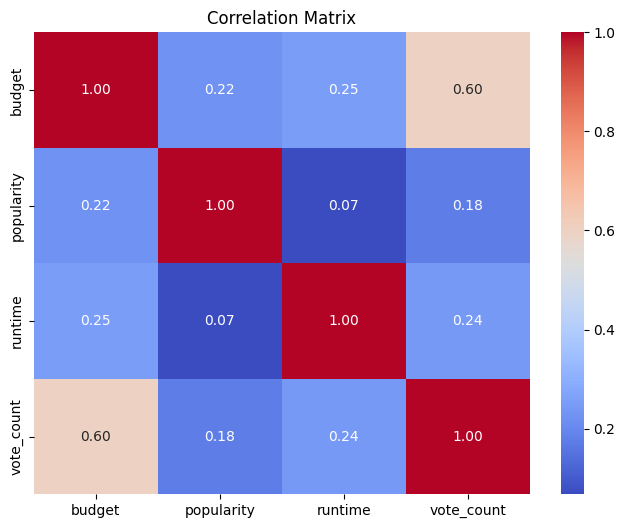

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


## ICE PLOT
## The ICE plot shows that while the average trend is negative, the impact of budget on predicted ratings varies across movies, meaning the model doesn’t treat all films the same way.

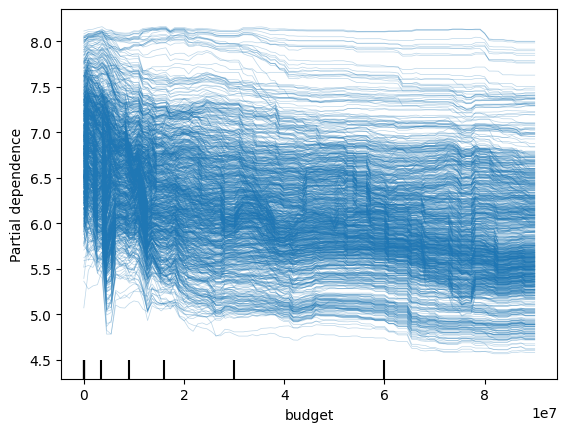

In [ ]:
# Choosing the feature of interest
features = ["budget"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual')

## The ALE plot confirms what the PDP and ICE plots showed:

Low-budget movies are predicted to score higher.

Higher budgets drag down predicted ratings, especially in the lower-to-mid range.

This can take a couple of minutes to run:

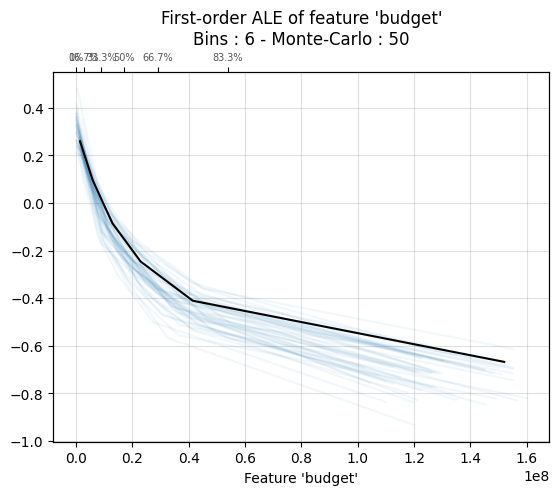

<Axes: title={'center': "First-order ALE of feature 'budget'\nBins : 6 - Monte-Carlo : 50"}, xlabel="Feature 'budget'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(model, X_train, 'budget', monte_carlo=True)

## This version of the ALE plot confirms the same negative trend as before

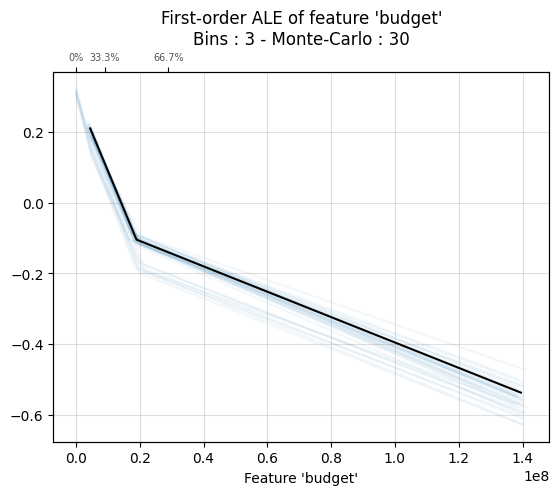

<Axes: title={'center': "First-order ALE of feature 'budget'\nBins : 3 - Monte-Carlo : 30"}, xlabel="Feature 'budget'">

In [ ]:
# Change hyperparameters for 1D Main Effect ALE Plot
ale_plot(
    model,
    X_train,
    "budget",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

### Budget and popularity interact:

A high budget by itself tends to hurt predictions (as we saw in the 1D ALE).

Popularity by itself has a positive effect.

Together: Popularity can mitigate or reverse the negative impact of budget. Big-budget films that are also popular push predictions upward.

This confirms the model has learned a synergistic effect: success depends not just on money, but whether that money translates into popularity.

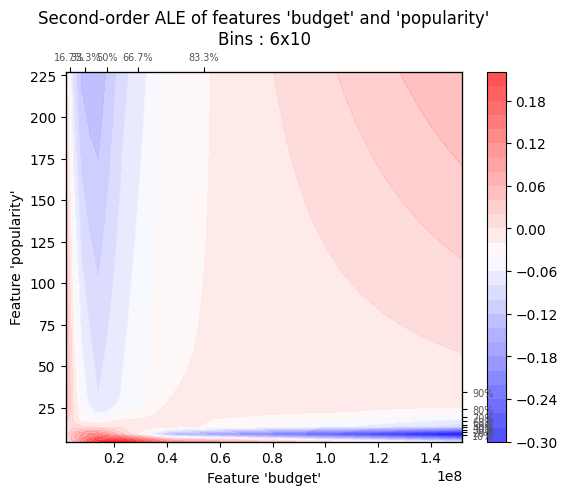

<Axes: title={'center': "Second-order ALE of features 'budget' and 'popularity'\nBins : 6x10"}, xlabel="Feature 'budget'", ylabel="Feature 'popularity'">

In [ ]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, X_train.columns[:2], bins=10)